# Import and Instal Dependencies

In [1]:
# !pip install seaborn

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

2024-06-19 20:18:11.485007: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 20:18:12.889717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-06-19 20:18:16.402636: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-19 20:18:16.699718: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-19 20:18:16.699860: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


# Gathering Data

## Export Data

In [3]:
dataset_base = pd.read_csv('../dataset/momentum_base.csv') # read csv file
dataset_mirror = pd.read_csv('../dataset/momentum_mirror.csv')
dataset_base_rotated = pd.read_csv('../dataset/momentum_base_rotated.csv') # read csv file
dataset_mirror_rotated = pd.read_csv('../dataset/momentum_mirror_rotated.csv')

In [4]:
dataset_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Columns: 133 entries, class to v33
dtypes: float64(132), int64(1)
memory usage: 10.7 MB


This dataset has 11550 rows with 2 class.
- 0 => Not Using Momentum
- 1 => Using Momentum

# Assessing Data

## Dataset Base

In [5]:
# check information about dataset
dataset_base.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 133 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   10578 non-null  int64  
 1    x1      10578 non-null  float64
 2    y1      10578 non-null  float64
 3    z1      10578 non-null  float64
 4    v1      10578 non-null  float64
 5    x2      10578 non-null  float64
 6    y2      10578 non-null  float64
 7    z2      10578 non-null  float64
 8    v2      10578 non-null  float64
 9    x3      10578 non-null  float64
 10   y3      10578 non-null  float64
 11   z3      10578 non-null  float64
 12   v3      10578 non-null  float64
 13   x4      10578 non-null  float64
 14   y4      10578 non-null  float64
 15   z4      10578 non-null  float64
 16   v4      10578 non-null  float64
 17   x5      10578 non-null  float64
 18   y5      10578 non-null  float64
 19   z5      10578 non-null  float64
 20   v5      10578 non-null  float64
 21   x6      10

In [6]:
# check for null value
dataset_base.isna().sum()

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v32      0
x33      0
y33      0
z33      0
v33      0
Length: 133, dtype: int64

In [7]:
# check for duplicate value
print("Duplicate Found : {} rows".format(dataset_base.duplicated().sum()))

Duplicate Found : 275 rows


Found 228 rows of duplicated value

In [8]:
# Drop Duplicated data
dataset_base.drop_duplicates(inplace=True)
print("Duplicate Found : {} rows".format(dataset_base.duplicated().sum()))

Duplicate Found : 0 rows


## Dataset Mirror

In [9]:
# check information about dataset
dataset_mirror.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 133 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   10578 non-null  int64  
 1    x1      10578 non-null  float64
 2    y1      10578 non-null  float64
 3    z1      10578 non-null  float64
 4    v1      10578 non-null  float64
 5    x2      10578 non-null  float64
 6    y2      10578 non-null  float64
 7    z2      10578 non-null  float64
 8    v2      10578 non-null  float64
 9    x3      10578 non-null  float64
 10   y3      10578 non-null  float64
 11   z3      10578 non-null  float64
 12   v3      10578 non-null  float64
 13   x4      10578 non-null  float64
 14   y4      10578 non-null  float64
 15   z4      10578 non-null  float64
 16   v4      10578 non-null  float64
 17   x5      10578 non-null  float64
 18   y5      10578 non-null  float64
 19   z5      10578 non-null  float64
 20   v5      10578 non-null  float64
 21   x6      10

In [10]:
# check for null value
dataset_mirror.isna().sum()

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v32      0
x33      0
y33      0
z33      0
v33      0
Length: 133, dtype: int64

In [11]:
# check for duplicate value
print("Duplicate Found : {} rows".format(dataset_mirror.duplicated().sum()))

Duplicate Found : 275 rows


Found 228 rows of duplicated value

In [12]:
# Drop Duplicated data
dataset_mirror.drop_duplicates(inplace=True)
print("Duplicate Found : {} rows".format(dataset_mirror.duplicated().sum()))

Duplicate Found : 0 rows


## Dataset Rotated

In [13]:
# check information about dataset
dataset_base_rotated.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 133 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   10578 non-null  int64  
 1    x1      10578 non-null  float64
 2    y1      10578 non-null  float64
 3    z1      10578 non-null  float64
 4    v1      10578 non-null  float64
 5    x2      10578 non-null  float64
 6    y2      10578 non-null  float64
 7    z2      10578 non-null  float64
 8    v2      10578 non-null  float64
 9    x3      10578 non-null  float64
 10   y3      10578 non-null  float64
 11   z3      10578 non-null  float64
 12   v3      10578 non-null  float64
 13   x4      10578 non-null  float64
 14   y4      10578 non-null  float64
 15   z4      10578 non-null  float64
 16   v4      10578 non-null  float64
 17   x5      10578 non-null  float64
 18   y5      10578 non-null  float64
 19   z5      10578 non-null  float64
 20   v5      10578 non-null  float64
 21   x6      10

In [14]:
# check for null value
dataset_base_rotated.isna().sum()

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v32      0
x33      0
y33      0
z33      0
v33      0
Length: 133, dtype: int64

In [15]:
# check for duplicate value
print("Duplicate Found : {} rows".format(dataset_base_rotated.duplicated().sum()))

Duplicate Found : 15 rows


Found 228 rows of duplicated value

In [16]:
# Drop Duplicated data
dataset_base_rotated.drop_duplicates(inplace=True)
print("Duplicate Found : {} rows".format(dataset_base_rotated.duplicated().sum()))

Duplicate Found : 0 rows


## Dataset Mirror Rotated

In [17]:
# check information about dataset
dataset_mirror_rotated.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 133 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   10578 non-null  int64  
 1    x1      10578 non-null  float64
 2    y1      10578 non-null  float64
 3    z1      10578 non-null  float64
 4    v1      10578 non-null  float64
 5    x2      10578 non-null  float64
 6    y2      10578 non-null  float64
 7    z2      10578 non-null  float64
 8    v2      10578 non-null  float64
 9    x3      10578 non-null  float64
 10   y3      10578 non-null  float64
 11   z3      10578 non-null  float64
 12   v3      10578 non-null  float64
 13   x4      10578 non-null  float64
 14   y4      10578 non-null  float64
 15   z4      10578 non-null  float64
 16   v4      10578 non-null  float64
 17   x5      10578 non-null  float64
 18   y5      10578 non-null  float64
 19   z5      10578 non-null  float64
 20   v5      10578 non-null  float64
 21   x6      10

In [18]:
# check for null value
dataset_mirror_rotated.isna().sum()

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v32      0
x33      0
y33      0
z33      0
v33      0
Length: 133, dtype: int64

In [19]:
# check for duplicate value
print("Duplicate Found : {} rows".format(dataset_mirror_rotated.duplicated().sum()))

Duplicate Found : 15 rows


Found 228 rows of duplicated value

In [20]:
# Drop Duplicated data
dataset_mirror_rotated.drop_duplicates(inplace=True)
print("Duplicate Found : {} rows".format(dataset_mirror_rotated.duplicated().sum()))

Duplicate Found : 0 rows


# Data Preprocessing

## Dataset Base and Mirror

In [21]:
# Check Ratio For the labels
for i in range(2):
    print("Class {} : {}".format(i, dataset_base['class'].value_counts()[i]))

Class 0 : 4926
Class 1 : 5377


The dataset is imbalanced, so we try to solve it with the downsampling method for all dataset.

In [22]:
# Dividing the dataset_base based on class
not_momentum_dataset_base = dataset_base[dataset_base['class']==0]
momentum_dataset_base = dataset_base[dataset_base['class']==1]


print(not_momentum_dataset_base.shape)
print(momentum_dataset_base.shape)


(4926, 133)
(5377, 133)


In [23]:
# Dividing the dataset_mirror based on class
not_momentum_dataset_mirror = dataset_mirror[dataset_mirror['class']==0]
momentum_dataset_mirror = dataset_mirror[dataset_mirror['class']==1]


print(not_momentum_dataset_mirror.shape)
print(momentum_dataset_mirror.shape)


(4926, 133)
(5377, 133)


In [24]:
# Balancing the data by minority class, for dataset base and mirror
from sklearn.utils import resample

momentum_dataset_base = resample(momentum_dataset_base,
                          replace = True,
                          n_samples = len(not_momentum_dataset_base),
                          random_state=42)

momentum_dataset_mirror = resample(momentum_dataset_mirror,
                          replace = True,
                          n_samples = len(not_momentum_dataset_mirror),
                          random_state=42)

In [25]:
print(not_momentum_dataset_base.shape)
print(momentum_dataset_base.shape)

print(not_momentum_dataset_mirror.shape)
print(momentum_dataset_mirror.shape)

(4926, 133)
(4926, 133)
(4926, 133)
(4926, 133)


class
0    4926
1    4926
Name: count, dtype: int64


<Axes: ylabel='Type'>

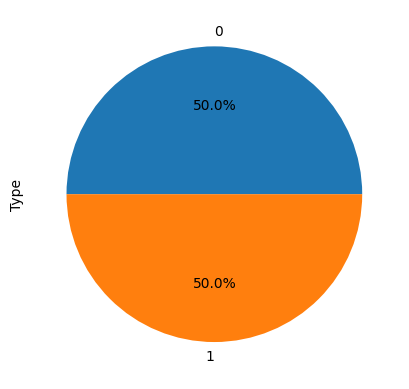

In [26]:
dataset_base_balanced = pd.concat([not_momentum_dataset_base, momentum_dataset_base], ignore_index=True)
dataset_mirror_balanced = pd.concat([not_momentum_dataset_mirror, momentum_dataset_mirror], ignore_index=True)


print(dataset_base_balanced["class"].value_counts())

dataset_base_balanced.groupby('class').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

**Dataset Balanced!**

## Dataset Base and Mirror Rotated

In [27]:
# Check Ratio For the labels
for i in range(2):
    print("Class {} : {}".format(i, dataset_base_rotated['class'].value_counts()[i]))

Class 0 : 4926
Class 1 : 5637


In [28]:
# Check Ratio For the labels
for i in range(2):
    print("Class {} : {}".format(i, dataset_mirror_rotated['class'].value_counts()[i]))

Class 0 : 4926
Class 1 : 5637


The dataset is imbalanced, so we try to solve it with the downsampling method for all dataset.

In [29]:
# Dividing the dataset_base based on class
not_momentum_dataset_base_rotated = dataset_base_rotated[dataset_base_rotated['class']==0]
momentum_dataset_base_rotated = dataset_base_rotated[dataset_base_rotated['class']==1]


print(not_momentum_dataset_base_rotated.shape)
print(momentum_dataset_base_rotated.shape)


(4926, 133)
(5637, 133)


In [30]:
# Dividing the dataset_mirror based on class
not_momentum_dataset_mirror_rotated = dataset_mirror_rotated[dataset_mirror_rotated['class']==0]
momentum_dataset_mirror_rotated = dataset_mirror_rotated[dataset_mirror_rotated['class']==1]


print(not_momentum_dataset_mirror_rotated.shape)
print(momentum_dataset_mirror_rotated.shape)


(4926, 133)
(5637, 133)


In [31]:
# Balancing the data by minority class, for dataset base and mirror
from sklearn.utils import resample

momentum_dataset_base_rotated = resample(momentum_dataset_base_rotated,
                          replace = True,
                          n_samples = len(not_momentum_dataset_base_rotated),
                          random_state=42)

momentum_dataset_mirror_rotated = resample(momentum_dataset_mirror_rotated,
                          replace = True,
                          n_samples = len(not_momentum_dataset_mirror_rotated),
                          random_state=42)

In [32]:
print(not_momentum_dataset_base_rotated.shape)
print(momentum_dataset_base_rotated.shape)

print(not_momentum_dataset_mirror_rotated.shape)
print(momentum_dataset_mirror_rotated.shape)

(4926, 133)
(4926, 133)
(4926, 133)
(4926, 133)


class
0    4926
1    4926
Name: count, dtype: int64


<Axes: ylabel='Type'>

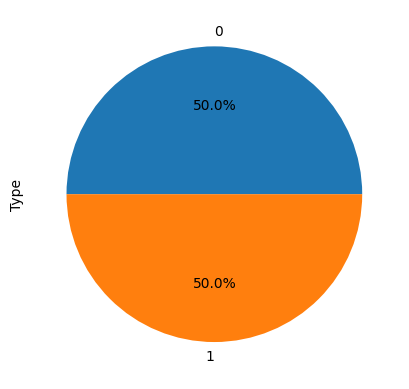

In [33]:
dataset_base_rotated_balanced = pd.concat([not_momentum_dataset_base_rotated, momentum_dataset_base_rotated], ignore_index=True)
dataset_mirror_rotated_balanced = pd.concat([not_momentum_dataset_mirror_rotated, momentum_dataset_mirror_rotated], ignore_index=True)


print(dataset_base_balanced["class"].value_counts())

dataset_base_balanced.groupby('class').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

**Dataset Balanced!**

## Feature Engineering

In [34]:
dataset_base_balanced

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,0,0.070751,-0.655423,-0.079170,0.999036,0.045846,-0.688515,-0.066321,0.998840,0.046160,...,-0.131226,0.722240,0.093341,0.792975,-0.020254,0.712191,0.043811,0.826984,-0.200899,0.698193
1,0,0.082822,-0.659732,-0.079623,0.999129,0.057342,-0.692528,-0.069135,0.998959,0.057661,...,-0.122624,0.707820,0.080407,0.791979,-0.004102,0.722943,0.039182,0.837185,-0.199442,0.689596
2,0,0.074924,-0.662250,-0.075422,0.999240,0.049206,-0.695002,-0.058927,0.999092,0.049534,...,-0.146142,0.710625,0.106081,0.798406,-0.017728,0.728131,0.036615,0.839767,-0.220839,0.698777
3,0,0.101073,-0.657218,-0.040565,0.999349,0.072429,-0.690718,-0.020760,0.999228,0.072701,...,-0.163226,0.712783,0.107960,0.791756,-0.036639,0.733901,0.040152,0.834333,-0.231214,0.705596
4,0,0.100848,-0.648591,-0.038920,0.999423,0.073776,-0.683197,-0.024054,0.999323,0.074041,...,-0.125463,0.701996,0.098985,0.792033,0.011247,0.737155,0.051485,0.832992,-0.191400,0.693059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,1,0.019777,-0.595978,-0.060649,0.999947,0.029111,-0.629408,-0.040610,0.999908,0.029620,...,-0.062459,0.499784,0.116100,0.861031,-0.162856,0.812462,-0.102242,0.860020,-0.184355,0.802140
9848,1,0.025457,-0.577042,0.067099,0.999939,0.032784,-0.610485,0.097533,0.999937,0.033271,...,-0.173559,0.495435,0.096749,0.837596,-0.302863,0.785562,-0.100577,0.816089,-0.308786,0.700153
9849,1,-0.009728,-0.688801,-0.177036,0.999862,-0.011089,-0.721069,-0.156972,0.999844,-0.010943,...,0.277670,0.183583,0.035247,0.452206,0.316092,0.195310,-0.060456,0.442309,0.337193,0.219886
9850,1,-0.048400,-0.732915,-0.110069,0.998905,-0.028216,-0.748213,-0.114758,0.999000,-0.027934,...,0.341717,0.780315,0.459849,0.564675,0.080353,0.738449,0.401315,0.602882,0.292108,0.754928


The output of the mediapipe consists of 33 coordinate points from head to toe. Each point will have 4 values, namely `X, Y, and Z` (For point coordinates) and `visibility` for the value of the point confidence.

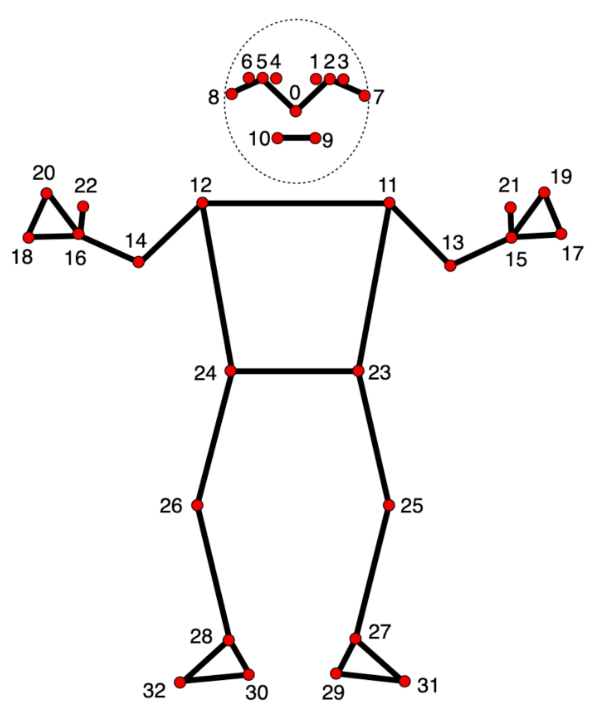

In [35]:
# see corelation map each data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataset_base_balanced.corr())

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,z3,v3,x4,y4,z4,v4,x5,y5,z5,v5,x6,y6,z6,v6,x7,y7,z7,v7,x8,y8,z8,v8,x9,y9,z9,v9,x10,y10,z10,v10,x11,y11,z11,v11,x12,y12,z12,v12,x13,y13,z13,v13,x14,y14,z14,v14,x15,y15,z15,v15,x16,y16,z16,v16,x17,y17,z17,v17,x18,y18,z18,v18,x19,y19,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21,x22,y22,z22,v22,x23,y23,z23,v23,x24,y24,z24,v24,x25,y25,z25,v25,x26,y26,z26,v26,x27,y27,z27,v27,x28,y28,z28,v28,x29,y29,z29,v29,x30,y30,z30,v30,x31,y31,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
class,1.000000,0.031294,0.031182,-0.124728,-0.108192,0.084659,0.029260,-0.135105,-0.109648,0.084090,0.028501,-0.134971,-0.111817,0.084672,0.028884,-0.134882,-0.126867,0.090307,0.026461,-0.118840,-0.154542,0.089840,0.027498,-0.118900,-0.177342,0.090161,0.026875,-0.118659,-0.192685,0.228290,0.010200,-0.176130,-0.129133,0.227667,-0.005770,-0.094204,-0.199413,0.097425,0.023601,-0.138391,-0.137474,0.101076,0.018758,-0.117086,-0.157726,0.203100,-0.087731,-0.278178,-0.035758,0.182777,-0.051410,-0.028377,-0.092446,-0.128410,-0.119557,-0.327185,-0.009863,0.169419,-0.063380,0.038614,-0.036860,-0.234642,-0.136838,-0.228259,0.080297,0.148006,-0.076715,-0.004541,-0.028247,-0.247144,-0.139695,-0.224639,0.166616,0.138705,-0.084758,-0.007150,0.030587,-0.238676,-0.135310,-0.210523,0.169015,0.160358,-0.085285,-0.014003,0.028878,-0.234821,-0.135589,-0.218375,0.167985,0.158926,-0.078401,-0.009766,0.035505,0.091408,-0.068829,-0.340862,0.068723,-0.090424,0.068987,0.342234,0.041215,-0.142168,-0.347067,-0.214569,0.107317,-0.402825,-0.312290,0.066788,0.122435,-0.053308,-0.424408,0.055198,-0.165111,-0.251471,-0.430953,0.189746,-0.148047,-0.047285,-0.423788,0.073532,-0.100388,-0.234670,-0.432303,0.197824,-0.100669,-0.129406,-0.396610,0.102911,-0.180382,-0.272676,-0.406076,0.232558,-0.150619
x1,0.031294,1.000000,-0.115585,0.019635,-0.014474,0.975881,-0.090918,0.021385,-0.002973,0.975903,-0.090750,0.021438,-0.004819,0.975998,-0.090381,0.021387,0.020010,0.970098,-0.113401,0.019238,0.008284,0.970261,-0.113603,0.019158,0.018832,0.970360,-0.113242,0.019369,0.039980,0.771670,-0.000937,0.033338,0.035834,0.742378,-0.109146,0.014461,0.043300,0.977702,-0.083922,0.021322,-0.014202,0.973092,-0.114425,0.018678,0.013634,0.506957,0.010309,0.003256,0.012247,0.548970,-0.032817,0.045760,-0.025751,0.193032,-0.010617,-0.024739,-0.044163,0.271363,0.022906,0.058295,-0.035617,0.144019,-0.021466,-0.056238,0.011692,0.294947,0.019279,0.062925,-0.005027,0.141977,-0.023300,-0.055607,0.020876,0.310107,0.016911,0.062664,0.005406,0.156150,-0.018750,-0.058679,0.021465,0.311160,0.018222,0.070385,0.001580,0.150244,-0.019409,-0.058286,0.009271,0.300206,0.019838,0.068085,-0.005928,-0.117498,0.061858,-0.150385,-0.017238,0.117584,-0.065715,0.150092,-0.011824,-0.272496,0.016348,-0.061841,-0.077325,-0.197887,0.001850,0.035019,-0.088148,-0.214944,0.062846,-0.071265,-0.023767,-0.193760,0.056617,-0.008702,-0.050082,-0.208791,0.065552,-0.070932,0.015089,-0.193392,0.059268,-0.011941,-0.003813,-0.258178,0.069557,-0.070263,-0.015429,-0.248144,0.051162,-0.008432,-0.034471
y1,0.031182,-0.115585,1.000000,0.515963,0.097254,-0.101993,0.989707,0.517082,0.130528,-0.102032,0.989638,0.516981,0.143973,-0.102707,0.989578,0.516985,0.141092,-0.110020,0.993176,0.518926,0.132601,-0.110142,0.993221,0.518742,0.140043,-0.110783,0.993143,0.519173,0.120332,-0.019915,0.871129,0.535195,0.145021,-0.062199,0.911186,0.545284,0.150193,-0.085506,0.991095,0.528893,0.177057,-0.093758,0.994119,0.530788,0.141427,0.046717,0.796632,0.534510,0.304527,-0.042661,0.780102,0.535512,0.340331,0.061369,0.626920,0.405648,-0.045692,-0.101071,0.601898,0.384987,-0.048956,-0.010412,0.587791,0.299874,-0.125092,-0.106535,0.549579,0.259509,-0.062278,-0.026013,0.584663,0.298809,-0.132156,-0.074508,0.543192,0.256207,-0.087308,-0.007003,0.579703,0.312145,-0.156886,-0.100485,0.539981,0.254564,-0.091524,-0.010493,0.585783,0.309294,-0.212086,-0.108278,0.546531,0.260677,-0.124791,0.063618,0.066535,-0.000016,0.070251,-0.064994,-0.060511,-0.002937,0.063958,-0.098533,-

Feature `v`s (`visibility`) have small correlation to class feature. So, we can drop them from the table. 

In [36]:
# Find all visibility columns
columns = dataset_base_balanced.columns
columns_to_drop = [column for column in columns if column.startswith('v')]
print(columns_to_drop)

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33']


In [37]:
# Drop v columns
dataset_base_xyz = dataset_base_balanced.drop(columns=columns_to_drop, inplace=False)
dataset_mirror_xyz = dataset_mirror_balanced.drop(columns=columns_to_drop, inplace=False)
dataset_base_rotated_xyz = dataset_base_rotated_balanced.drop(columns=columns_to_drop, inplace=False)
dataset_mirror_rotated_xyz = dataset_mirror_rotated_balanced.drop(columns=columns_to_drop, inplace=False)

dataset_base_xyz

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0,0.070751,-0.655423,-0.079170,0.045846,-0.688515,-0.066321,0.046160,-0.689200,-0.065733,...,0.016302,-0.008288,0.757136,-0.131226,0.093341,0.792975,-0.020254,0.043811,0.826984,-0.200899
1,0,0.082822,-0.659732,-0.079623,0.057342,-0.692528,-0.069135,0.057661,-0.693200,-0.068526,...,0.033615,-0.018322,0.771442,-0.122624,0.080407,0.791979,-0.004102,0.039182,0.837185,-0.199442
2,0,0.074924,-0.662250,-0.075422,0.049206,-0.695002,-0.058927,0.049534,-0.695703,-0.058331,...,0.021030,-0.015037,0.768256,-0.146142,0.106081,0.798406,-0.017728,0.036615,0.839767,-0.220839
3,0,0.101073,-0.657218,-0.040565,0.072429,-0.690718,-0.020760,0.072701,-0.691379,-0.020132,...,-0.005112,-0.019783,0.762348,-0.163226,0.107960,0.791756,-0.036639,0.040152,0.834333,-0.231214
4,0,0.100848,-0.648591,-0.038920,0.073776,-0.683197,-0.024054,0.074041,-0.683838,-0.023481,...,0.042479,-0.020605,0.762650,-0.125463,0.098985,0.792033,0.011247,0.051485,0.832992,-0.191400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,1,0.019777,-0.595978,-0.060649,0.029111,-0.629408,-0.040610,0.029620,-0.629811,-0.040055,...,-0.055144,-0.104818,0.800548,-0.062459,0.116100,0.861031,-0.162856,-0.102242,0.860020,-0.184355
9848,1,0.025457,-0.577042,0.067099,0.032784,-0.610485,0.097533,0.033271,-0.611124,0.098229,...,-0.202562,-0.078113,0.773211,-0.173559,0.096749,0.837596,-0.302863,-0.100577,0.816089,-0.308786
9849,1,-0.009728,-0.688801,-0.177036,-0.011089,-0.721069,-0.156972,-0.010943,-0.721903,-0.156011,...,0.269464,-0.047766,0.361426,0.277670,0.035247,0.452206,0.316092,-0.060456,0.442309,0.337193
9850,1,-0.048400,-0.732915,-0.110069,-0.028216,-0.748213,-0.114758,-0.027934,-0.748794,-0.114240,...,0.168622,0.420164,0.519854,0.341717,0.459849,0.564675,0.080353,0.401315,0.602882,0.292108


Now we only have dataset with XYZ coordinates

## Feature Engineer

Because, we predict momentum while doing pull-ups, all coordinates are matter. So, we don't try to drop some columns.

In [38]:
# dataset xyz
dataset_base_xyz # complete dataset

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0,0.070751,-0.655423,-0.079170,0.045846,-0.688515,-0.066321,0.046160,-0.689200,-0.065733,...,0.016302,-0.008288,0.757136,-0.131226,0.093341,0.792975,-0.020254,0.043811,0.826984,-0.200899
1,0,0.082822,-0.659732,-0.079623,0.057342,-0.692528,-0.069135,0.057661,-0.693200,-0.068526,...,0.033615,-0.018322,0.771442,-0.122624,0.080407,0.791979,-0.004102,0.039182,0.837185,-0.199442
2,0,0.074924,-0.662250,-0.075422,0.049206,-0.695002,-0.058927,0.049534,-0.695703,-0.058331,...,0.021030,-0.015037,0.768256,-0.146142,0.106081,0.798406,-0.017728,0.036615,0.839767,-0.220839
3,0,0.101073,-0.657218,-0.040565,0.072429,-0.690718,-0.020760,0.072701,-0.691379,-0.020132,...,-0.005112,-0.019783,0.762348,-0.163226,0.107960,0.791756,-0.036639,0.040152,0.834333,-0.231214
4,0,0.100848,-0.648591,-0.038920,0.073776,-0.683197,-0.024054,0.074041,-0.683838,-0.023481,...,0.042479,-0.020605,0.762650,-0.125463,0.098985,0.792033,0.011247,0.051485,0.832992,-0.191400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,1,0.019777,-0.595978,-0.060649,0.029111,-0.629408,-0.040610,0.029620,-0.629811,-0.040055,...,-0.055144,-0.104818,0.800548,-0.062459,0.116100,0.861031,-0.162856,-0.102242,0.860020,-0.184355
9848,1,0.025457,-0.577042,0.067099,0.032784,-0.610485,0.097533,0.033271,-0.611124,0.098229,...,-0.202562,-0.078113,0.773211,-0.173559,0.096749,0.837596,-0.302863,-0.100577,0.816089,-0.308786
9849,1,-0.009728,-0.688801,-0.177036,-0.011089,-0.721069,-0.156972,-0.010943,-0.721903,-0.156011,...,0.269464,-0.047766,0.361426,0.277670,0.035247,0.452206,0.316092,-0.060456,0.442309,0.337193
9850,1,-0.048400,-0.732915,-0.110069,-0.028216,-0.748213,-0.114758,-0.027934,-0.748794,-0.114240,...,0.168622,0.420164,0.519854,0.341717,0.459849,0.564675,0.080353,0.401315,0.602882,0.292108


We using LSTM architecture here, so we need to transform our dataset shape into sequences dataset

In [39]:
# Determine the sequences
SEQUENCES = 40

X = []
y = []

In [40]:
# Dataset Base
X_base_class_0 = dataset_base_xyz[dataset_base_xyz['class']==0].reset_index(drop=True).iloc[:, 1:].values
X_base_class_1 = dataset_base_xyz[dataset_base_xyz['class']==1].reset_index(drop=True).iloc[:, 1:].values

n_samples_0 = len(X_base_class_0)
n_samples_1 = len(X_base_class_1)


for i in range(SEQUENCES, n_samples_0):
    X.append(X_base_class_0[i-SEQUENCES:i, :])
    y.append(0)

for i in range(SEQUENCES, n_samples_1):
    X.append(X_base_class_1[i-SEQUENCES:i, :])
    y.append(1)

In [41]:
# Dataset Mirror
X_mirror_class_0 = dataset_mirror_xyz[dataset_mirror_xyz['class']==0].reset_index(drop=True).iloc[:, 1:].values
X_mirror_class_1 = dataset_mirror_xyz[dataset_mirror_xyz['class']==1].reset_index(drop=True).iloc[:, 1:].values

n_samples_0 = len(X_mirror_class_0)
n_samples_1 = len(X_mirror_class_1)


for i in range(SEQUENCES, n_samples_0):
    X.append(X_mirror_class_0[i-SEQUENCES:i, :])
    y.append(0)

for i in range(SEQUENCES, n_samples_1):
    X.append(X_mirror_class_1[i-SEQUENCES:i, :])
    y.append(1)

In [42]:
# # Dataset base rotated
# X_base_rotated_class_0 = dataset_base_rotated_xyz[dataset_base_rotated_xyz['class']==0].reset_index(drop=True).iloc[:, 1:].values
# X_base_rotated_class_1 = dataset_base_rotated_xyz[dataset_base_rotated_xyz['class']==1].reset_index(drop=True).iloc[:, 1:].values

# n_samples_0 = len(X_base_rotated_class_0)
# n_samples_1 = len(X_base_rotated_class_1)

# for i in range(SEQUENCES, n_samples_0, SEQUENCES):
#     X.append(X_base_rotated_class_0[i-SEQUENCES:i, :])
#     y.append(0)

# for i in range(SEQUENCES, n_samples_1, SEQUENCES):
#     X.append(X_base_rotated_class_1[i-SEQUENCES:i, :])
#     y.append(1)

In [43]:
# # Dataset mirror rotated
# X_mirror_rotated_class_0 = dataset_mirror_rotated_xyz[dataset_mirror_rotated_xyz['class']==0].reset_index(drop=True).iloc[:, 1:].values
# X_mirror_rotated_class_1 = dataset_mirror_rotated_xyz[dataset_mirror_rotated_xyz['class']==1].reset_index(drop=True).iloc[:, 1:].values

# n_samples_0 = len(X_mirror_rotated_class_0)
# n_samples_1 = len(X_mirror_rotated_class_1)

# for i in range(SEQUENCES, n_samples_0, SEQUENCES):
#     X.append(X_mirror_rotated_class_0[i-SEQUENCES:i, :])
#     y.append(0)

# for i in range(SEQUENCES, n_samples_1, SEQUENCES):
#     X.append(X_mirror_rotated_class_1[i-SEQUENCES:i, :])
#     y.append(1)

In [44]:
# convert list X and y to np array
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(19544, 40, 99)
(19544,)


# Build Model

## LTSM Model

In [47]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# one hot dataset
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [49]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = layers.LSTM(64, return_sequences=True, activation='relu')(inputs)
x = layers.LSTM(128, return_sequences=True, activation='relu')(x)
x = layers.LSTM(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_LSTM = Model(inputs, outputs)
model_LSTM.summary()

2024-06-19 20:19:58.240351: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-19 20:19:58.240468: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-19 20:19:58.240558: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-19 20:19:58.451829: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-19 20:19:58.451957: I external/local_xla/xla/stream_executor

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 40, 99)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 40, 64)         │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 40, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,514 (767.63 KB)

 Trainable params: 196,514 (767.63 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_LSTM.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
history = model_LSTM.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=5)

Epoch 1/5


2024-06-19 20:20:02.633730: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 247658400 exceeds 10% of free system memory.
2024-06-19 20:20:02.776373: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 247658400 exceeds 10% of free system memory.
I0000 00:00:1718803206.205373   39732 service.cc:145] XLA service 0x1517fe20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718803206.205600   39732 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-06-19 20:20:06.319273: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-19 20:20:06.979009: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  5/489 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5526 - loss: 0.6926

I0000 00:00:1718803211.731904   39732 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


489/489 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.7248 - loss: 0.7579 - val_accuracy: 0.5168 - val_loss: 0.6594
Epoch 2/5
489/489 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.8421 - loss: 0.4596 - val_accuracy: 0.9923 - val_loss: 0.0901
Epoch 3/5
489/489 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9333 - loss: 0.2313 - val_accuracy: 0.9990 - val_loss: 0.0125
Epoch 4/5
489/489 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9980 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/5
489/489 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 4.0804e-04


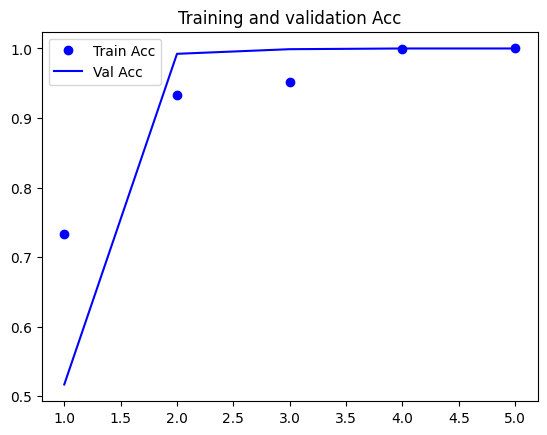

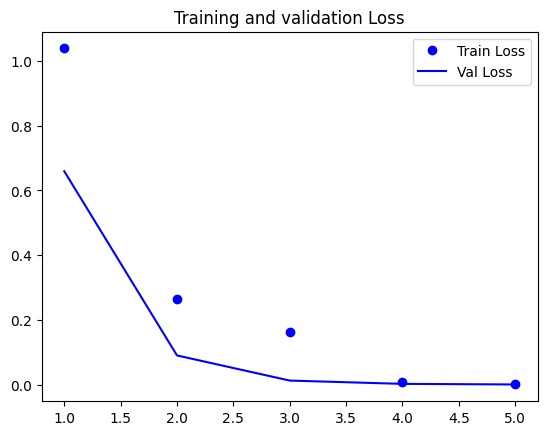

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [53]:
dir_path = '../Model/xyz_LSTM_1/'
tf.saved_model.save(model_LSTM, dir_path)

INFO:tensorflow:Assets written to: ../Model/xyz_LSTM_1/assets


INFO:tensorflow:Assets written to: ../Model/xyz_LSTM_1/assets
